In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Ano com maior quantidade de mortes
1. Longevidade
1. Clube dos 27 (pessoas que morreram com 27 anos)

In [14]:
df = pd.read_csv('AgeDatasetClean.csv', sep='|')
df

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Age of death
0,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,67.0
1,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,49.0
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,56.0
3,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,35.0
4,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,57.0
...,...,...,...,...,...,...,...,...
732956,Wim de Vreng,Dutch swimmer,Male,Kingdom of the Netherlands,Athlete,1930,1980.0,50.0
732957,James Smillie,goudsmid uit Schotland (1784-1841),Male,Scotland,Goldsmith,1784,1841.0,57.0
732958,Gustav Siber,entrepreneur from Switzerland,Male,Switzerland,Entrepreneur,1857,1924.0,67.0
732959,Reginald Oswald Pearson,"English artist, working in stained glass, prin...",Male,United Kingdom,Artist,1887,1915.0,28.0


In [15]:
df.nunique()

Name                 689988
Short description    323654
Gender                   19
Country                5505
Occupation             7750
Birth year             1887
Death year             1928
Age of death             91
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732961 entries, 0 to 732960
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               732961 non-null  object 
 1   Short description  732961 non-null  object 
 2   Gender             732961 non-null  object 
 3   Country            732961 non-null  object 
 4   Occupation         732961 non-null  object 
 5   Birth year         732961 non-null  int64  
 6   Death year         732961 non-null  float64
 7   Age of death       732961 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 44.7+ MB


In [17]:
df.describe()

,Birth year,Death year,Age of death
count,732961.000000,732961.000000,732961.000000
mean,1862.675478,1933.037836,70.362358
std,124.853161,128.017179,15.943488
min,-2284.000000,-2200.000000,11.000000
25%,1847.000000,1914.000000,61.000000
50%,1894.000000,1965.000000,73.000000
75%,1921.000000,1999.000000,82.000000
max,2003.000000,2021.000000,122.000000


In [18]:
df['Age of death'].value_counts()

80.0     20304
78.0     20076
77.0     20039
79.0     19993
74.0     19884
         ...  
13.0        85
12.0        79
11.0        70
122.0        1
121.0        1
Name: Age of death, Length: 91, dtype: int64

In [19]:
df['Gender'].value_counts()

Male                                              659548
Female                                             73286
Transgender Female                                    57
Transgender Male                                      30
Eunuch; Male                                          13
Intersex                                               7
Female; Male                                           5
Transgender Male; Female                               3
Non-Binary                                             2
Female; Female                                         1
Transgender Female; Intersex                           1
Eunuch                                                 1
Transgender Male; Male                                 1
Transgender Female; Female                             1
Intersex; Transgender Male                             1
Transgender Female; Male                               1
Intersex; Male                                         1
Transgender Person; Intersex; T

In [20]:
#Adicionando demais Generos na condição Outros
df.loc[df['Gender'] == 'Transgender Female', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Transgender Male', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Eunuch; Male', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Intersex', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Female; Male', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Eunuch', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Transgender Male; Female', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Non-Binary', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Intersex; Male', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Transgender Female; Male', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Transgender Person; Intersex; Transgender Male', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Non-Binary; Intersex', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Intersex; Female', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Transgender Female; Female', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Intersex; Transgender Male', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Transgender Female; Intersex', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Transgender Male; Male', 'Gender'] = 'Outros'
df.loc[df['Gender'] == 'Female; Female', 'Gender'] = 'Outros'

In [21]:
df[df["Gender"] == 'Outros']

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Age of death
852,Danielle Bunten Berry,American game designer and programmer,Outros,United States of America,Researcher,1949,1998.0,49.0
4524,Dora Ratjen,German high jumper,Outros,Germany,Athlete,1918,2008.0,90.0
12502,Jeffrey Catherine Jones,artist (1944-2011),Outros,United States of America,Artist,1944,2011.0,67.0
21173,Karl M. Baer,"German-Israeli author, social worker, reformer...",Outros,Germany; Israel,Artist,1885,1956.0,71.0
31915,Ajita Wilson,American actress,Outros,United States of America,Artist,1950,1987.0,37.0
...,...,...,...,...,...,...,...,...
719528,João W. Nery,Brazilian transgender writer,Outros,Brazil,Artist,1950,2018.0,68.0
719867,Tereza Spencer,Czech journalist,Outros,Czech Republic,Journalist,1965,2020.0,55.0
722802,Julia Grant,British transgender activist,Outros,United Kingdom,Activist,1954,2019.0,65.0
726487,Marcia Torres,First transgender woman that had a sex reassig...,Outros,Chile,Hairdresser; vedette,1949,2011.0,62.0


<AxesSubplot:xlabel='Death year', ylabel='Count'>

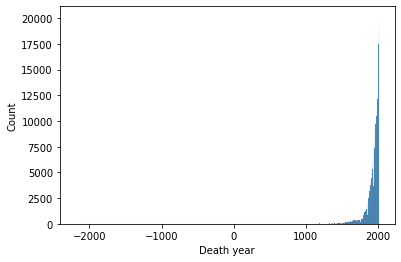

In [34]:
sns.histplot(df['Death year'])